In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    return np.full((N, M), value)
def plotlattice(lattice):
    plt.imshow(lattice,cmap = "binary")
    plt.show()


In [5]:
def pointChange(lattice,i,j,BornNums,SurvNums,locs,vals):
    if lattice[i][j] == 1:
        for num in SurvNums:
            if neighborSums(lattice,i,j,locs,vals) == num:
                return 1
        return 0
    else:
        for num in BornNums:
            if neighborSums(lattice,i,j,locs,vals) == num:
                return 1
        return 0
    
def neighborSums(lattice, i , j, locs, vals):
    ip = (i + 1) % len(lattice)
    im = (i - 1) % len(lattice)
    jp = (j + 1) % len(lattice[0])
    jm = (j - 1) % len(lattice[0])
    
    weight = [1 for i in range(8)]
    for i in range(len(locs)):
        weight[locs[i]] = vals[i]
    return (weight[4]*lattice[ip][j] + weight[3]*lattice[im][j]+ weight[1]*lattice[i][jp] + weight[6]*lattice[i][jm] + weight[2]*lattice[ip][jp] + weight[7]*lattice[ip][jm] +weight[0]*lattice[im][jp] + weight[5]*lattice[im][jm])
def plot_lattice_pcolor(lattice, ax=None):
    """
    Create a visualization of a lattice 
    """
    if ax is None:
        ax = plt.gca()
    
    edgecolor = 'black' if max(lattice.shape) < 25 else None
    im = ax.pcolormesh(lattice, cmap='binary', edgecolor=edgecolor, vmax=1, vmin=-1)
    ax.set_aspect('equal')
    return im

In [4]:
def singleStep(lattice, B, S, locs,vals) :
    output = normallattice(len(lattice),len(lattice[0]))
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            output[i][j] = pointChange(lattice,i,j,B,S,locs,vals)
    return output
def manySteps(lattice,num_steps,B = [3], S = [2,3], locs = [] , vals = []) :
    for i in range(num_steps):
        lattice = singleStep(lattice,B,S,locs,vals)
        plotlattice(lattice)
    return lattice
def manyStepsOnePlot(lattice,num_steps,B = [3], S = [2,3],locs = [] , vals = []) :
    plotlattice(lattice)
    for i in range(num_steps):
        lattice = singleStep(lattice,B,S,locs,vals)
        plotlattice(lattice)
    return lattice


In [8]:
def PutGlider(lattice,i,j):
    lattice[i% len(lattice)][j% len(lattice[0])] = 1
    lattice[i% len(lattice)][(j+2) % len(lattice[0])] = 1
    lattice[(i+1)% len(lattice)][(j+1)% len(lattice[0])] = 1
    lattice[(i+1)% len(lattice)][(j+2)% len(lattice[0])] = 1
    lattice[(i-1)% len(lattice)][(j+2)% len(lattice[0])] = 1
    return lattice
def GliderLat(size):
    lattice = normallattice(size,size)
    lattice = PutGlider(lattice, int(size/2),int(size/2))
    return lattice

In [9]:
def updatefig(lattice):
    dataImg = history[lattice, :-1,:-1]
    im.set_array(np.ravel(dataImg.T))

    return im


Traceback (most recent call last):
  File "/Users/michaelhaas/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/michaelhaas/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/michaelhaas/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/Users/michaelhaas/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1750, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/michaelhaas/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1777, in _draw_frame
    for a in self._drawn_artists:
TypeError: 'QuadMesh' object is not iterable


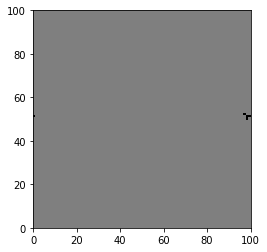

In [15]:
size = 100
Nsteps = 25
history = []
Bn = [3]
Sn = [2,3]
loc = []
val = []
lattice = GliderLat(size)

for t in range(Nsteps):
    lattice = singleStep(lattice, B = Bn, S = Sn, locs = loc, vals = val) 
    history.append(lattice.copy())
history = np.asarray(history)
fig, ax = plt.subplots()
im = plot_lattice_pcolor(lattice, ax=ax)

anim = animation.FuncAnimation(fig, updatefig, np.arange(0, len(history)), repeat=True, interval=30)

plt.show()